In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
assets = ['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL'] # Assets for portfolio
w = np.array([0.1, 0.2, 0.1, 0.4, 0.2]) # Weights of each asset

asset_prices = yf.download(assets, start='2018-01-01', end='2023-01-01', auto_adjust = False)['Adj Close'] # Downloading daily data
asset_prices.index = pd.to_datetime(asset_prices.index) # Setting index as datetime object

r = asset_prices.pct_change().dropna() # Calculating daily percent returns

r.head() # Each column is r_{i}

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2018-01-03,-0.000174,0.012775,0.017061,0.004654,-0.010233
2018-01-04,0.004645,0.004476,0.003884,0.008801,-0.008290
2018-01-05,0.011385,0.016163,0.013260,0.012398,0.006230
2018-01-08,-0.003714,0.014425,0.003531,0.001020,0.062638
2018-01-09,-0.000115,0.004676,-0.001274,-0.000680,-0.008085


In [3]:
r_port = r @ w # Creating portfolio returns
r_port.name = 'portfolio_returns'
r_port.head()

Date
2018-01-03    0.004059
2018-01-04    0.003611
2018-01-05    0.011902
2018-01-08    0.015802
2018-01-09   -0.001093
Name: portfolio_returns, dtype: float64

In [4]:
print("The 25th quantile is: ", r['MSFT'].quantile(0.25),"\nThe 75th quantile is: ", r['MSFT'].quantile(0.75))

The 25th quantile is:  -0.00833137381312904 
The 75th quantile is:  0.010938019594203374


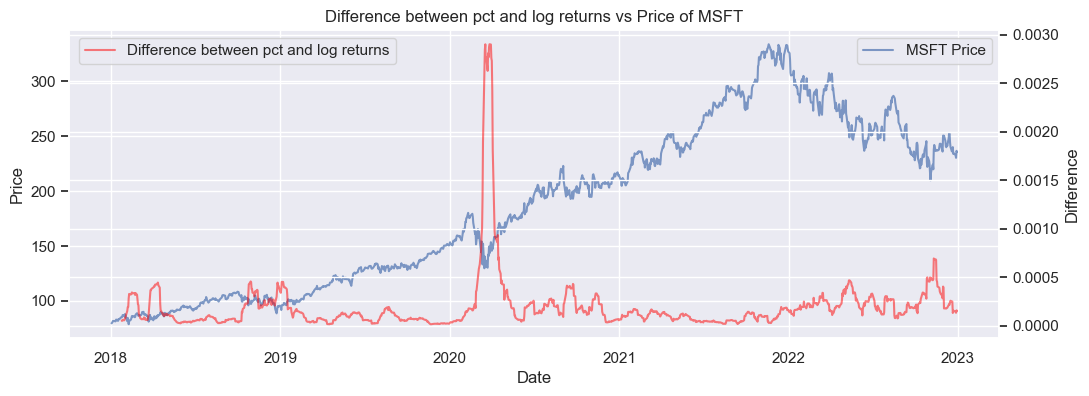

In [5]:
# Figure 1

pct_returns_msft = asset_prices['MSFT'].pct_change().dropna() # Calculating pct returns
log_returns_msft = np.log(asset_prices['MSFT'] / asset_prices['MSFT'].shift(1)).dropna() # Calculating log returns

pct_change_msft_roll_mean = pct_returns_msft.rolling(15).mean() # Rolling average of pct returns
log_returns_msft_roll_mean = log_returns_msft.rolling(15).mean() # Rolling average of log returns

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Difference between pct and log returns vs Price of MSFT')
ax.plot(asset_prices['MSFT'], label = 'MSFT Price', alpha = 0.7)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend()

ax2 = ax.twinx()
ax2.plot((pct_change_msft_roll_mean - log_returns_msft_roll_mean), color = 'red', alpha = 0.5, label = 'Difference between pct and log returns')
ax2.set_ylabel('Difference')
ax2.legend(loc = (0.01,0.89))
plt.show()

In [6]:
percent_returns_tsla = asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"].pct_change().dropna() # Calculating daily percent returns
geom_mean_tsla_1 = ((1 + percent_returns_tsla).prod() ** (1/len(percent_returns_tsla))) - 1 # Calculating geometric mean

log_returns_tsla = np.log(asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"] / asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"].shift(1)).dropna() # Calculating daily log returns
arithmetic_mean_tsla_1 = log_returns_tsla.mean() # Calculating arithmetic mean

print("Logarithm of geometric Mean of TSLA + 1: ", np.log(geom_mean_tsla_1 + 1))
print("Arithmetic Mean of TSLA: ", arithmetic_mean_tsla_1)

Logarithm of geometric Mean of TSLA + 1:  0.010242784447195914
Arithmetic Mean of TSLA:  0.010242784447195903


In [7]:
geom_mean_msft = ((1 + pct_returns_msft).prod() ** (1/len(pct_returns_msft))) - 1 # Calculating geometric mean
annual_pct_returns_msft = (1 + geom_mean_msft) ** 252 - 1 # Annualizing percent returns

annual_log_returns_msft = log_returns_msft.mean() * 252 # Annualizing log returns

print("Annualized pct returns of MSFT: ", annual_pct_returns_msft)
print("Annualized log returns of MSFT: ", annual_log_returns_msft)

Annualized pct returns of MSFT:  0.2430654995645869
Annualized log returns of MSFT:  0.21758050588248098


In [8]:
port_var = w.T @ r.cov() @ w # Calculating portfolio variance
port_std = np.sqrt(port_var) # Calculating portfolio standard deviation

print("Portfolio variance: ", port_var)
print("Portfolio standard deviation: ", port_std)

Portfolio variance:  0.0004110712721261165
Portfolio standard deviation:  0.020274892653874065
